In [ ]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
# Load dataset
df = pd.read_csv('usecase_3_.csv')

In [ ]:
# EDA
# 1. Check the first few rows of the data
df.head()

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,75209,118014,NCT00559130,Efficacy Study of CytoSorb Hemoperfusion Devic...,https://clinicaltrials.gov/study/NCT00559130,NaN,COMPLETED,The hypothesis of this study is use of CytoSor...,NO,Acute Respiratory Distress Syndrome|Acute Lung...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2007-01,2007-11,2011-04,2011-06,2007-11-16,NaN,2011-06-07,"Aachen, Germany|Berlin, Germany|Bonn, Germany|...",NaN
1,6356,9987,NCT00937664,Safety and Tolerability Study of AZD7762 in Co...,https://clinicaltrials.gov/study/NCT00937664,NaN,TERMINATED,The primary purpose of this study is to find o...,NO,Cancer|Solid Tumors|Advanced Solid Malignancies,...,Allocation: NON_RANDOMIZED|Intervention Model:...,D1040C00008,2009-07,2011-02,2011-02,2009-07-13,NaN,2011-02-07,"Research Site, Minami-ku, Fukuoka, Japan",NaN
2,143427,226012,NCT00441597,Does Atorvastatin Reduce Ischemia-Reperfusion ...,https://clinicaltrials.gov/study/NCT00441597,NaN,COMPLETED,To study the impact of 3 day exposure to atorv...,NO,Ischemia Reperfusion Injury|Cardiovascular Dis...,...,Allocation: RANDOMIZED|Intervention Model: CRO...,atorv01,2007-02,2009-02,2009-03,2007-03-01,NaN,2009-03-17,"Radboud University Nijmegen Medical Centre, Ni...",NaN
3,138885,218952,NCT03296228,Comparison of Dynamic Radiographs in Determini...,https://clinicaltrials.gov/study/NCT03296228,NaN,COMPLETED,The purpose of this study is to identify the f...,NO,Adolescent Idiopathic Scoliosis,...,Observational Model: |Time Perspective: p,UW 16-208,2016-05-01,2018-05-01,2018-12-31,2017-09-28,NaN,2020-05-06,"Duchess of Kent Children's Hospital, Hong Kong...",NaN
4,9769,15382,NCT00421603,A Placebo-Controlled Study of Mixed Amphetamin...,https://clinicaltrials.gov/study/NCT00421603,TACT,COMPLETED,"The proposed protocol is a double-blind, place...",YES,Cocaine Dependence,...,Allocation: RANDOMIZED|Intervention Model: PAR...,#5368|R01DA022217,2007-02,2010-05,2010-05,2007-01-12,2013-02-28,2019-04-24,"STARS, New York, New York, 10032, United States",NaN


In [ ]:
df.shape

(257577, 32)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'NCT Number', 'Study Title', 'Study URL',
       'Acronym', 'Study Status', 'Brief Summary', 'Study Results',
       'Conditions', 'Interventions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257577 entries, 0 to 257576
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                257577 non-null  int64  
 1   Unnamed: 0                  257577 non-null  int64  
 2   NCT Number                  257577 non-null  object 
 3   Study Title                 257577 non-null  object 
 4   Study URL                   257577 non-null  object 
 5   Acronym                     63991 non-null   object 
 6   Study Status                257577 non-null  object 
 7   Brief Summary               257577 non-null  object 
 8   Study Results               257577 non-null  object 
 9   Conditions                  257577 non-null  object 
 10  Interventions               234064 non-null  object 
 11  Primary Outcome Measures    247086 non-null  object 
 12  Secondary Outcome Measures  185779 non-null  object 
 13  Other Outcome 

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Enrollment
count,257577.000000,257577.000000,2.542050e+05
mean,160870.734336,253249.196714,4.374388e+03
std,92962.873081,146367.626782,4.476837e+05
min,0.000000,0.000000,0.000000e+00
25%,80347.000000,126134.000000,2.400000e+01
50%,160813.000000,253661.000000,6.000000e+01
75%,241404.000000,380220.000000,1.600000e+02
max,321971.000000,506541.000000,1.888141e+08


In [ ]:
df.nunique()

Unnamed: 0.1                  257577
Unnamed: 0                    257577
NCT Number                    257577
Study Title                   256885
Study URL                     257577
Acronym                        52454
Study Status                       4
Brief Summary                 256391
Study Results                      2
Conditions                    102973
Interventions                 198548
Primary Outcome Measures      244191
Secondary Outcome Measures    184792
Other Outcome Measures         18199
Sponsor                        26239
Collaborators                  35926
Sex                                3
Age                                6
Phases                             7
Enrollment                      6513
Funder Type                        9
Study Type                         2
Study Design                    1443
Other IDs                     254188
Start Date                      8049
Primary Completion Date         6925
Completion Date                 6981
F

In [ ]:
# 2. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0.1                       0
Unnamed: 0                         0
NCT Number                         0
Study Title                        0
Study URL                          0
Acronym                       193586
Study Status                       0
Brief Summary                      0
Study Results                      0
Conditions                         0
Interventions                  23513
Primary Outcome Measures       10491
Secondary Outcome Measures     71798
Other Outcome Measures        239305
Sponsor                            0
Collaborators                 173898
Sex                              260
Age                                0
Phases                        144812
Enrollment                      3372
Funder Type                        0
Study Type                         0
Study Design                       0
Other IDs                         21
Start Date                      2332
Primary Completion Date        12904
Completion Date      

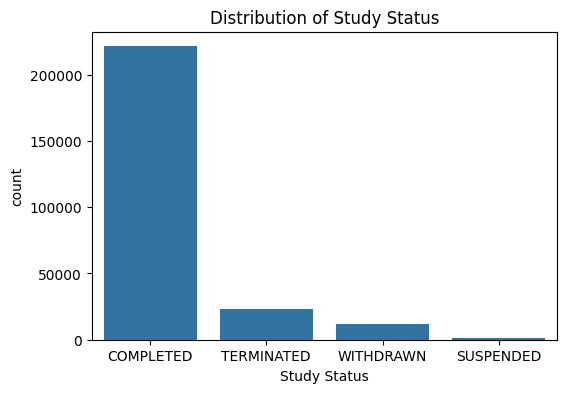

In [ ]:
# 5. Visualize distribution of target variable - Study Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Study Status', data=df)
plt.title('Distribution of Study Status')
plt.show()

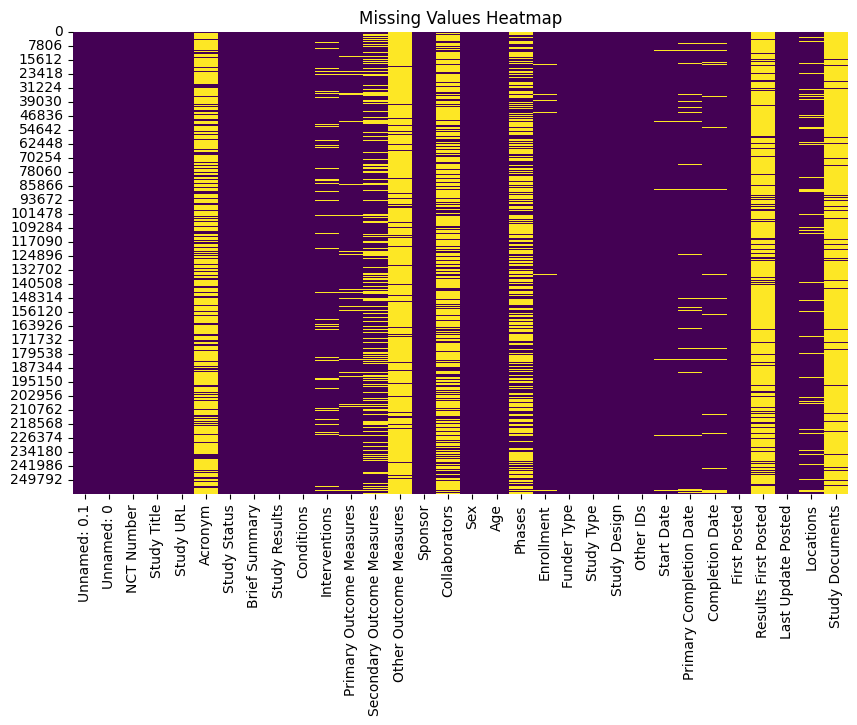

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('missing_values_heatmap.png')
plt.show()

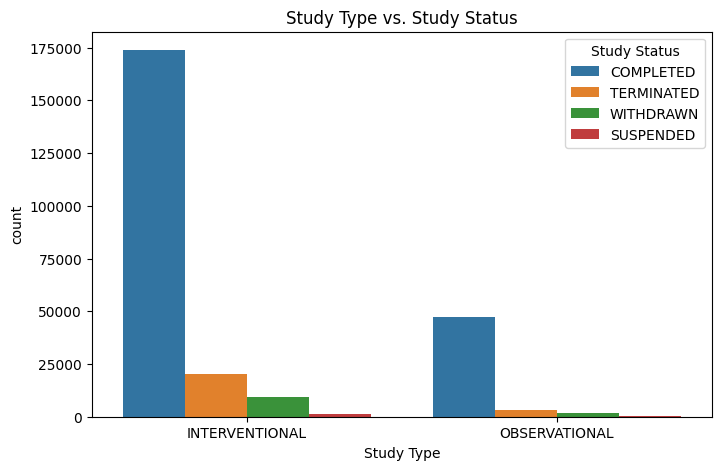

In [ ]:
# Countplot: Study Type vs. Study Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Study Type', hue='Study Status', data=df)
plt.title('Study Type vs. Study Status')
plt.show()

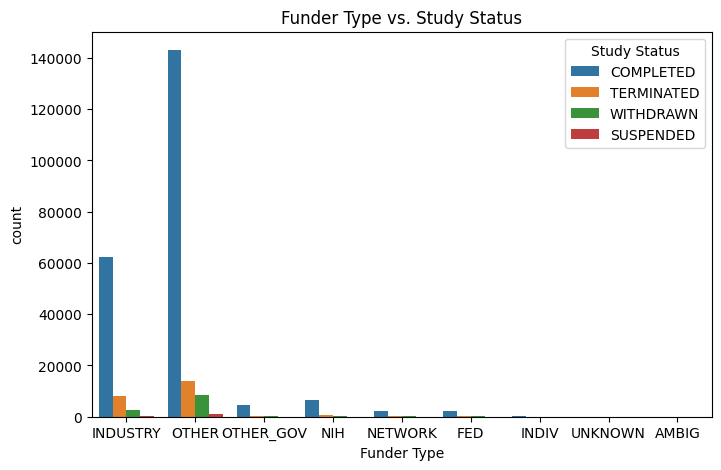

In [ ]:
# Countplot: Funder Type vs. Study Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Funder Type', hue='Study Status', data=df)
plt.title('Funder Type vs. Study Status')
plt.show()

In [ ]:
# Text Preprocessing Function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [ ]:
# Apply the text preprocessing on the textual columns
df['Study Title'] = df['Study Title'].fillna('').apply(preprocess_text)
df['Brief Summary'] = df['Brief Summary'].fillna('').apply(preprocess_text)
df['Study Results'] = df['Study Results'].fillna('').apply(preprocess_text)

In [ ]:
# Feature Extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=200)  # Limiting to 200 features for simplicity

In [ ]:
# Create TF-IDF features for each of the textual columns
title_tfidf = vectorizer.fit_transform(df['Study Title']).toarray()
summary_tfidf = vectorizer.fit_transform(df['Brief Summary']).toarray()
results_tfidf = vectorizer.fit_transform(df['Study Results']).toarray()

In [ ]:
# Convert these features into DataFrames
title_tfidf_df = pd.DataFrame(title_tfidf, columns=[f'Title_TFIDF_{i}' for i in range(title_tfidf.shape[1])])
summary_tfidf_df = pd.DataFrame(summary_tfidf, columns=[f'Summary_TFIDF_{i}' for i in range(summary_tfidf.shape[1])])
results_tfidf_df = pd.DataFrame(results_tfidf, columns=[f'Results_TFIDF_{i}' for i in range(results_tfidf.shape[1])])

In [ ]:
# Concatenate these features with the main dataframe
df = pd.concat([df, title_tfidf_df, summary_tfidf_df, results_tfidf_df], axis=1)

In [ ]:
# Remove Unnecessary Columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Study URL', 'NCT Number', 'Acronym', 'Other IDs', 'Collaborators', 'Locations', 'Study Documents'])

In [ ]:
# Handle Null Values (Categorical and Numerical)
categorical_cols = ['Conditions', 'Interventions', 'Sponsor', 'Funder Type', 'Study Type', 'Study Design', 'Phases', 'Sex', 'Age']
df[categorical_cols] = df[categorical_cols].fillna('Not Specified')

numerical_cols = ['Enrollment']
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


In [ ]:
# Add Binary Indicator for Missing Values (for numerical columns)
for col in numerical_cols:
    df[f'{col}_Missing'] = df[col].isnull().astype(int)

In [ ]:
# Feature Engineering: Create Temporal Features
# Convert date columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')
df['First Posted'] = pd.to_datetime(df['First Posted'], errors='coerce')

In [ ]:
# Trial Duration (Days and Months)
df['Trial_Duration_Days'] = (df['Completion Date'] - df['Start Date']).dt.days
df['Trial_Duration_Months'] = df['Trial_Duration_Days'] / 30

In [ ]:
# Time to Primary Completion (Days and Months)
df['Time_to_Primary_Completion_Days'] = (df['Primary Completion Date'] - df['Start Date']).dt.days
df['Time_to_Primary_Completion_Months'] = df['Time_to_Primary_Completion_Days'] / 30

In [ ]:
# Time Since First Posted (Days and Months)
df['Time_Since_First_Posted_Days'] = (df['Completion Date'] - df['First Posted']).dt.days
df['Time_Since_First_Posted_Months'] = df['Time_Since_First_Posted_Days'] / 30

In [ ]:
# Handle Categorical Feature Interactions (Study Design x Funder Type)
df['Study_Design_Funder_Type'] = df['Study Design'] + '_' + df['Funder Type']

In [ ]:
# Handle Phase x Sponsor Interaction
df['Phase_Sponsor'] = df['Phases'] + '_' + df['Sponsor']

In [ ]:
# Handle Numerical Feature Interactions (Enrollment x Phase)
phase_mapping = {'Phase 1': 1, 'Phase 2': 2, 'Phase 3': 3}
df['Phase_Numerical'] = df['Phases'].map(phase_mapping).fillna(0)
df['Enrollment_x_Phase'] = df['Enrollment'] * df['Phase_Numerical']

In [ ]:
# Target Encoding for Categorical Features (e.g., Conditions)
target_encoding = df.groupby('Conditions')['Study Status'].value_counts(normalize=True).unstack().fillna(0)['COMPLETED']
df['Condition_Completion_Rate'] = df['Conditions'].map(target_encoding)

In [ ]:
# **Reclassifying Study Status**
df['Study_Status_Updated'] = df['Study Status'].replace({'SUSPENDED': 'NOT COMPLETED', 'WITHDRAWN': 'NOT COMPLETED','TERMINATED': 'NOT COMPLETED'})

In [ ]:
# Create 'Status_Explanation' column
df['Status_Explanation'] = np.where(df['Study_Status_Updated'] == 'NOT COMPLETED',
                                     df['Study Status'].apply(lambda x: 'SUSPENDED' if x == 'SUSPENDED' else ('WITHDRAWN' if x == 'WITHDRAWN' else 'NOT COMPLETED')),
                                     'COMPLETED')

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Study_Status_Updated'] = label_encoder.fit_transform(df['Study_Status_Updated'])

In [ ]:
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Other Outcome Measures,Sponsor,...,Time_to_Primary_Completion_Months,Time_Since_First_Posted_Days,Time_Since_First_Posted_Months,Study_Design_Funder_Type,Phase_Sponsor,Phase_Numerical,Enrollment_x_Phase,Condition_Completion_Rate,Study_Status_Updated,Status_Explanation
0,efficacy study cytosorb hemoperfusion device i...,COMPLETED,hypothesis study use cytosorb hemoperfusion de...,,Acute Respiratory Distress Syndrome|Acute Lung...,DEVICE: CytoSorb Hemoperfusion,Relative IL-6 levels as a percent (%) of basel...,"Ventilator Free Days, Reduction cytokines TNF-...",NaN,"MedaSorb Technologies, Inc",...,41.566667,1293.0,43.100000,Allocation: RANDOMIZED|Intervention Model: PAR...,"Not Specified_MedaSorb Technologies, Inc",0.0,0.0,1.000000,0,COMPLETED
1,safety tolerability study azd7762 combination ...,TERMINATED,primary purpose study find maximum tolerated d...,,Cancer|Solid Tumors|Advanced Solid Malignancies,DRUG: AZD7762|DRUG: gemcitabine,Assessment of adverse events (based on CTCAE v...,Pharmacokinetic effect of AZD7762 when adminis...,NaN,AstraZeneca,...,19.333333,568.0,18.933333,Allocation: NON_RANDOMIZED|Intervention Model:...,PHASE1_AstraZeneca,0.0,0.0,0.500000,1,NOT COMPLETED
2,atorvastatin reduce ischemiareperfusion injury...,COMPLETED,study impact 3 day exposure atorvastatin 80mg ...,,Ischemia Reperfusion Injury|Cardiovascular Dis...,DRUG: atorvastatin,Annexin A 5 targeting in the non dominant then...,"workload during ischemic exercise, workload du...",NaN,Radboud University Medical Center,...,24.366667,731.0,24.366667,Allocation: RANDOMIZED|Intervention Model: CRO...,PHASE4_Radboud University Medical Center,0.0,0.0,1.000000,0,COMPLETED
3,comparison dynamic radiographs determining fus...,COMPLETED,purpose study identify flexibility radiographs...,,Adolescent Idiopathic Scoliosis,"RADIATION: Flexibility Radiographs (supine, su...",Investigate the flexibility equivalence of dif...,Incorporate these findings into the Lenke Clas...,NaN,The University of Hong Kong,...,NaN,NaN,NaN,Observational Model: |Time Perspective: p_OTHER,Not Specified_The University of Hong Kong,0.0,0.0,0.826087,0,COMPLETED
4,placebocontrolled study mixed amphetamine salt...,COMPLETED,proposed protocol doubleblind placebocontrolle...,yes,Cocaine Dependence,DRUG: Adderall-XR and Topiramate|DRUG: Placebo,Three Weeks of Continuous Cocaine Abstinence a...,NaN,NaN,New York State Psychiatric Institute,...,39.500000,1205.0,40.166667,Allocation: RANDOMIZED|Intervention Model: PAR...,PHASE2_New York State Psychiatric Institute,0.0,0.0,0.858974,0,COMPLETED


In [ ]:
# Filter columns with missing values
missing_columns = df.columns[df.isnull().any()]

# Print all columns with missing values
print("Columns with missing values:\n")
for col in missing_columns:
    print(f"{col}: {df[col].isnull().sum()} missing values")


Columns with missing values:

Primary Outcome Measures: 10491 missing values
Secondary Outcome Measures: 71798 missing values
Other Outcome Measures: 239305 missing values
Start Date: 121258 missing values
Primary Completion Date: 137841 missing values
Completion Date: 135039 missing values
Results First Posted: 205996 missing values
Trial_Duration_Days: 137758 missing values
Trial_Duration_Months: 137758 missing values
Time_to_Primary_Completion_Days: 140187 missing values
Time_to_Primary_Completion_Months: 140187 missing values
Time_Since_First_Posted_Days: 135039 missing values
Time_Since_First_Posted_Months: 135039 missing values


In [ ]:
# Define imputation rules for numerical and categorical columns
numerical_columns = [
    'Trial_Duration_Days', 'Trial_Duration_Months',
    'Time_to_Primary_Completion_Days', 'Time_to_Primary_Completion_Months',
    'Time_Since_First_Posted_Days', 'Time_Since_First_Posted_Months'
]

date_columns = ['Start Date', 'Primary Completion Date', 'Completion Date']
categorical_columns = [
    'Primary Outcome Measures', 'Secondary Outcome Measures',
    'Other Outcome Measures', 'Results First Posted', 'Study Results'
]

# Impute numerical columns with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Impute date columns with the mode (most frequent date)
for col in date_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute categorical columns with 'Not Specified'
for col in categorical_columns:
    df[col] = df[col].fillna('Not Specified')

# Verify all missing values are handled
print("Remaining Missing Values:\n")
print(data.isnull().sum()[data.isnull().sum() > 0])


Remaining Missing Values:

Series([], dtype: int64)


In [ ]:
# Save the preprocessed data for further use
df.to_csv('preprocessed_data_.csv', index=False)